# Proyek Analisis Data: [E-Commerce Public Dataset ]
- **Nama:** Dyah Kumalarani Mahakerty
- **Email:** m004d4kx1597@bangkit.academy
- **ID Dicoding:** dyah_km_REbm

## Menentukan Pertanyaan Bisnis

**1. Bagaimana total order dan penghasilan yang didapatkan dalam beberapa bulan terakhir?**

**2. Produk pada kategori apa yang paling banyak dan paling sedikit terjual?**

**3. Berapa rata-rata rating yang diberikan oleh pelanggan ketika membeli produk yang favorit terjual?**

**4. Bagaimana demografi pelanggan yang dimiliki dan berapa waktu delivery rata-ratanya?**

## Import Semua Packages/Library yang Digunakan

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [2]:
#Panggil dataset order menggunakan variabel order_df
order_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
#Panggil dataset order_items menggunakan variabel order_items_df
order_items_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
#Panggil dataset customer menggunakan variabel customer_df
customer_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#Panggil dataset product menggunakan variabel product_df
product_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
#Panggil dataset review menggunakan variabel review_df
review_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
#Panggil dataset product translate menggunakan variabel translateprod_df
translateprod_df = pd.read_csv("https://raw.githubusercontent.com/DyahKM/projectdicoding/main/product_category_name_translation.csv")
translateprod_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai tabel `order_df`

- Lihat detail dari order_df

In [8]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat beberapa kolom yang bernilai null. Oleh karena itu kita harus mengecek berapa banyak nilai null didalamnya sebagai berikut :*

In [9]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [10]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [11]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `order_items_df`




- Lihat detail dari order_df

In [12]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat tidak ada kolom yang bernilai null. Akan tetapi kita bisa mengecek kembali berapa banyak nilai null didalamnya sebagai berikut :*

In [13]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [14]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [15]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `customer_df`




- Lihat detail dari order_df

In [16]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat tidak ada kolom yang bernilai null. Akan tetapi kita bisa mengecek kembali berapa banyak nilai null didalamnya sebagai berikut :*

In [17]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [18]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [19]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `product_df`




- Lihat detail dari order_df

In [20]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat terdapat kolom yang bernilai null. Oleh karena itu, kita bisa mengecek berapa banyak nilai null didalamnya sebagai berikut :*

In [21]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [22]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [23]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `review_df`




- Lihat detail dari order_df

In [24]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat terdapat kolom yang bernilai null. Oleh karena itu, kita bisa mengecek berapa banyak nilai null didalamnya sebagai berikut :*

In [25]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [26]:
print("Jumlah duplikasi: ", review_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [27]:
review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `translateprod_df`




- Lihat detail dari order_df

In [28]:
translateprod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


*Terdapat perbedaan jumlah pada beberapa kolom, hal ini menandakan terdapat tidak ada kolom yang bernilai null. Akan tetapi kita bisa mengecek kembali berapa banyak nilai null didalamnya sebagai berikut :*

In [29]:
translateprod_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

*Selain itu, kita juga harus mengecek data duplikat pada dataset tersebut sebagai berikut*

In [30]:
print("Jumlah duplikasi: ", translateprod_df.duplicated().sum())

Jumlah duplikasi:  0


*Ternyata tidak terdapat data yang terduplikat*

In [31]:
translateprod_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


*** Jadi, semua data diatas tidak memiliki data duplikat. Akan tetapi pada data order_df, product_df, dan review_df terdapat nilai null yang harus dibersihkan terlebih dahulu  ***

### Cleaning Data

#### Membersihkan tabel `order_df`

##### Mengatasi Null Value tabel `order_df`

In [32]:
#Cek pada order_df manakah yang mengandung nilai null
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


_dari beberapa kasus null adalah yang memiliki status canceled, hal ini berarti baris yang memiliki status 'canceled' tidak berguna dan akan di drop. Setelah itu kita cek kembali nilai null yang ada_


In [33]:
#drop kolom order_status yang bernilai canceled
order_df = order_df.drop(order_df[order_df['order_status'] == 'canceled'].index, axis=0)

_cek kembali nilai null_

In [34]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date     1233
order_delivered_customer_date    2346
order_estimated_delivery_date       0
dtype: int64

In [35]:
#Cek pada order_df manakah yang mengandung nilai null
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


_Isi fillna pada kolom order_approved_at dengan 0_

In [36]:
order_df['order_approved_at'] = order_df['order_approved_at'].fillna(0)

__Untuk kolom order_delivered_carrier_date  akan dihilangkan saja karena tidak digunakan dalam analisis, lalu pada kolom order_delivered_customer_date yang null akan disamakan dengan order_estimated_delivery_date__

In [37]:
# Menghilangkan kolom 'order_delivered_carrier_date'
order_df_1 = order_df.drop('order_delivered_carrier_date', axis=1)

# Mengisi nilai-null pada kolom 'order_delivered_customer_date' dengan nilai dari 'order_estimated_delivery_date'
order_df_1['order_delivered_customer_date'] = order_df_1['order_delivered_customer_date'].fillna(order_df_1['order_estimated_delivery_date'])

In [38]:
order_df_1.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

__setelah kasus null sudah selesai, maka selanjutnya adalah mengubah kolom  order_purchase_timestamp  dan  order_delivered_customer_date menjadi datetime__

##### Mengubah tipe data

In [39]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df_1[column] = pd.to_datetime(order_df_1[column])

In [40]:
order_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98816 non-null  object        
 1   customer_id                    98816 non-null  object        
 2   order_status                   98816 non-null  object        
 3   order_purchase_timestamp       98816 non-null  datetime64[ns]
 4   order_approved_at              98816 non-null  object        
 5   order_delivered_customer_date  98816 non-null  datetime64[ns]
 6   order_estimated_delivery_date  98816 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(4)
memory usage: 6.0+ MB


#### Membersihkan tabel `product_df`

##### Membersihkan nilai null

In [41]:
#Cek pada product_df manakah yang mengandung nilai null
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


_karena tidak bisa mengidentifikasi termasuk kategori apa product tersebut dan product individu juga tidak berguna di dalam analisis maka akan dilakukan drop value_

In [42]:
product_df = product_df.dropna(subset=['product_category_name'])

In [43]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

##### Memilih kolom yang hanya dibutuhkan saja

In [44]:
product_df = product_df[['product_id', 'product_category_name']]

#### Membersihkan tabel `review_df`

##### Mengatasi nilai null

In [45]:
review_df[review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


_karena analisis juga tidak memerlukan review title dan comment hanya membutuhkan review score maka untuk membersihkan null bisa dengan mengisi fillna dengan nilai 0 ataupun drop kolom saja_ Kali ini akan dilakukan drop kolom untuk mempersingkat proses

In [46]:
review_df = review_df[['review_id', 'order_id', 'review_score']]

In [47]:
review_df.isna().sum()

review_id       0
order_id        0
review_score    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [48]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
98268,3e46be620fcaf37ac9efd5c713002d84,d42265f040cf881a93d007a892cd824c,24736,sao goncalo,RJ
93513,c51f405288b3495a09849d62a83e5cf9,3e668d1b083949f2e7e72a9cbb3d6079,46190,paramirim,BA
89545,69a7c2c293e83fd36e2fd81a7bcb74b3,b5447d364a6201833d7e004e22283a6c,79115,campo grande,MS
61058,89030dfae02f74f589085b54f056b49b,fb17629bb725ea02d4aaaf72f709557d,5881,sao paulo,SP
39827,2713a21879b222ab38ade5733139232f,d578639b3381f6d6afa8f049337ab68b,32415,ibirite,MG


In [49]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [50]:
#Cek apakah customer_id termasuk unik
customer_df.customer_unique_id.is_unique

False

_customer_unique_id memiliki nilai unik yang berbeda dengan customer id, berarti 1 customer (customer_uniqe_id) bisa melakukan order lebih dari 1_

In [51]:
#Mengecek customer mana yang melakukan order lebih dari 1 kali
customer_uniq_counts = customer_df['customer_unique_id'].value_counts()
# Menampilkan 5 nilai teratas yang paling sering muncul
top_5_customers = customer_uniq_counts.head(5)
# Menampilkan hasil
print(top_5_customers)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
Name: customer_unique_id, dtype: int64


*berarti customer dengan id 8d50f5eadf50201ccdcedfb9e2ac8455 dan 3e43e6105506432c953e165fb2acf44c paling sering melakukan transaksi*

Selanjutnya bagaimana demografi customer? paling mana state yang banyak melakukan order? Hal ini bisa dilakukan dengan menghitung customer state yang ada

In [52]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Selain state kita juga bisa menghitung berdasarkan city, untuk mengetahui dari kota mana customer yang sering membeli

In [53]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Selain itu city dan state juga bisa dipadukan sebagai berikut


In [54]:
customer_df.groupby(by=["customer_state" , "customer_city"]).customer_id.nunique().sort_values(ascending=False)

customer_state  customer_city 
SP              sao paulo         15540
RJ              rio de janeiro     6882
MG              belo horizonte     2773
DF              brasilia           2131
PR              curitiba           1521
                                  ...  
RS              cerro grande          1
                cerrito               1
                caseiros              1
MG              ipuiuna               1
AC              brasileia             1
Name: customer_id, Length: 4310, dtype: int64

***Akan tetapi dari explore ini masih belum final karena demografi tersebut diambil dari semua data customer, padahal belum tentu semua customer pada tersebut melakukan order sampai success. Oleh karena itu nantinya akan dilakukan explore kembali***

### Explore order_df_1

In [55]:
order_df_1.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
19267,262a22b18b8c7773c9ce2e3665db8c44,fa89c63e13c0be467dd82ddedc566260,delivered,2017-04-13 06:49:20,2017-04-13 07:02:07,2017-04-18 18:55:25,2017-05-08
56959,6b75c3e52a1fb04bd0b4f1975febc486,e8bfce998bdf363fe7a15422b17c1597,delivered,2018-05-09 17:04:10,2018-05-09 17:35:59,2018-05-14 13:49:03,2018-05-17
58356,429f9f7849e2149c03ac3e4ba5659050,b5bc395b6c0cc16a6432e87867c0d5a8,delivered,2018-04-03 14:23:55,2018-04-03 14:35:23,2018-05-04 10:16:48,2018-05-28
5818,9c63f9900d02e4981d36f0a782075043,26c8098256a9f305d2d7238204f5642f,delivered,2018-06-07 08:36:30,2018-06-09 03:13:26,2018-06-19 19:12:17,2018-07-27
5603,b49fb5d1cf86975cf5a295431c278a33,919898139ad85605b36f05302f908a95,delivered,2018-06-11 18:18:36,2018-06-12 18:46:06,2018-06-20 15:45:20,2018-06-28


In [56]:
order_df_1.describe(include="all")

<ipython-input-56-44712740ed7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df_1.describe(include="all")
<ipython-input-56-44712740ed7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df_1.describe(include="all")
<ipython-input-56-44712740ed7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df_1.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
count,98816,98816,98816,98816,98816.0,98816,98816
unique,98816,98816,7,98257,90302.0,96043,448
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-06-01 13:39:44,0.0,2018-02-06 00:00:00,2017-12-20 00:00:00
freq,1,1,96478,3,19.0,19,520
first,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-09-03 09:06:57,NaN,2018-10-17 13:22:46,2018-10-25 00:00:00


In [57]:
#Cek apakah customer_id termasuk unik
order_df_1.customer_id.is_unique

True

_Jika customer_id pada order adalah unik berarti rata-rata 1 customer id memiliki 1 order_

Selanjutnya adalah menghitung rata-rata waktu delivery yang diperlukan setiap order. Hal ini bisa menggunakan opsi pengurangan order_purchase_timestamp dan order_delivered_customer_date

In [58]:
delivery_time = order_df_1["order_delivered_customer_date"] - order_df_1["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df_1["delivery_time"] = round(delivery_time/86400)

Selain itu bisa dihitung kecepatan estimasi delivery expected dengan realnya dengan mengurangkan order_delivered_customer_date dan order_estimated_delivery_date. Jika kolom tersebut bernilai positif maka delivery lebih cepat dari yang diperkirakan dan jika nilai nya besar maka menandakan delivery berjalan dengan cepat

In [59]:
delivery_time = order_df_1["order_estimated_delivery_date"] - order_df_1["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df_1["expected_delivery"] = round(delivery_time/86400)

In [60]:
order_df_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,expected_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,8.0,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,22.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,25.0,6.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,17.0,20.0


### Explore order_df_1 dan customer_df

Kita akan menggabungkan tabel order dan customer untuk mencari demografi dari customer yang melakukan order dan mencari delivery time setiap demografi tersebut

In [61]:
orders_customers_df = pd.merge(
    left=order_df_1,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,expected_delivery,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [62]:
# Melakukan pengelompokan dan agregasi pada DataFrame
state_customer = orders_customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

# Mengganti nama kolom 'customer_state' menjadi 'count_of_state'
state_customer.rename_axis("count_of_state", inplace=True)

# Menampilkan hasil
print(state_customer)

count_of_state
SP    41419
RJ    12766
MG    11571
RS     5441
PR     5023
SC     3618
BA     3364
DF     2133
ES     2024
GO     2007
PE     1647
CE     1329
PA      971
MT      905
MA      743
MS      713
PB      534
PI      491
RN      485
AL      412
SE      349
TO      279
RO      250
AM      148
AC       81
AP       68
RR       45
Name: customer_id, dtype: int64


In [63]:
orders_customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo           15400
rio de janeiro       6834
belo horizonte       2756
brasilia             2124
curitiba             1511
                    ...  
salto do itarare        1
cerrito                 1
cerro grande            1
ipaumirim               1
riacho da cruz          1
Name: customer_id, Length: 4117, dtype: int64

Selain itu city dan state juga bisa dipadukan sebagai berikut

In [64]:
orders_customers_df.groupby(by=["customer_state" , "customer_city"]).customer_id.nunique().sort_values(ascending=False)

customer_state  customer_city  
SP              sao paulo          15400
RJ              rio de janeiro      6834
MG              belo horizonte      2756
DF              brasilia            2124
PR              curitiba            1511
                                   ...  
MG              ingai                  1
RS              caseiros               1
MG              ipuiuna                1
RS              capivari do sul        1
AC              brasileia              1
Name: customer_id, Length: 4308, dtype: int64

Setelah mendapatkan demografi rata-rata, maka dapat digali kembali delivery time rata-rata yang perlu dihabiskan untuk mengirim ke state tersebut

In [131]:
result= orders_customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_state" : "count" ,
    "delivery_time": ["max", "min", "mean", "std"],
    "expected_delivery" : ["max", "min", "mean", "std"]
})
result.reset_index(inplace=True)

In [132]:
# Flatten the multi-level column index
result.columns = ['_'.join(col).strip() for col in result.columns.values]
# Sort berdasarkan jumlah state yang paling banyak muncul
result_sorted_delivery = result.sort_values(by="customer_state_count", ascending=False)
print(result_sorted_delivery)

   customer_state_  customer_id_nunique  customer_state_count  \
25              SP                41419                 41419   
18              RJ                12766                 12766   
10              MG                11571                 11571   
22              RS                 5441                  5441   
17              PR                 5023                  5023   
23              SC                 3618                  3618   
4               BA                 3364                  3364   
6               DF                 2133                  2133   
7               ES                 2024                  2024   
8               GO                 2007                  2007   
15              PE                 1647                  1647   
5               CE                 1329                  1329   
13              PA                  971                   971   
12              MT                  905                   905   
9               MA       

### Explore product_df, translateprod_df, dan order_items_df

#### Menggabungkan data `product_df` dan `translateprod_df`

In [67]:
product_df.sample(10)

,product_id,product_category_name
32221,441293f432282ea2ab9c82fe5f0fb875,moveis_decoracao
23009,8db7c6497625f4f17d770bd01912cbe8,bebes
27216,b23b10e4282fc95fb2db440d4dded066,instrumentos_musicais
13796,347b87eae9fc537319fceb5bf22d22fe,beleza_saude
31906,d0d9ae9cac6217cb49b4f19ce50b8e22,utilidades_domesticas
6611,310fb273d383efab30a7599552f3bfe8,moveis_escritorio
1223,d0fb1e667e989933a80444f93da833c0,utilidades_domesticas
12904,04f9ba792a88dcfa0a4ecadb4d0ad913,esporte_lazer
28243,6afab9e71cf3c11c8baa174027ef4312,fashion_bolsas_e_acessorios
14208,ee6cf0274e75706751ecd4cd5e353db6,cool_stuff


In [68]:
translateprod_df.sample(10)

,product_category_name,product_category_name_english
35,casa_conforto,home_confort
39,livros_tecnicos,books_technical
2,automotivo,auto
67,artes_e_artesanato,arts_and_craftmanship
52,sinalizacao_e_seguranca,signaling_and_security
1,informatica_acessorios,computers_accessories
40,casa_construcao,home_construction
19,consoles_games,consoles_games
42,moveis_sala,furniture_living_room
10,alimentos_bebidas,food_drink


In [69]:
product_new_df = pd.merge(
    left=product_df,
    right=translateprod_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_new_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


#### Menggabungkan data `product_new_df` dan `order_items_df`

In [70]:
order_items_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
86897,c556be66c245e4bfc475064dbe859d61,1,081088b5ca67de215fa103434690cedc,d66c305afaec317ebee552073a674429,2017-03-31 15:10:20,139.00,11.58
89786,cbf012d904aadfcf846e4e8d16192616,1,abc3432ff825d8e524db1d4eac6d2099,8d956fec2e4337affcb520f56fd8cbfd,2018-03-28 00:50:32,39.99,7.39
36398,528ef07892f35406f1e19482c11714a4,1,ea44caac707f7f1325182a538007f838,855668e0971d4dfd7bef1b6a4133b41b,2018-01-12 18:01:35,52.00,17.61
66585,982f203457d0f597a575b40512d66b1d,1,35ebf08a93899d44e756809e11b14754,128639473a139ac0f3e5f5ade55873a5,2018-02-26 19:28:34,18.90,15.10
39135,58e8270bb23a598a7a351d4fc3a211a4,1,e8c2065927de366ef9622dbee0bb7b63,9c0e69c7bf2619675bbadf47b43f655a,2017-08-31 18:24:34,203.00,18.67
90272,cd0589dd69b11dbb8ca5adbe3fb753e6,2,a19b6951c75da43aad691622dd2f6abe,1025f0e2d44d7041d6cf58b6550e0bfa,2018-07-18 21:44:00,35.00,9.00
78112,b1c2e69c9063d5ab5c9fe9138ecb08e0,1,ddceb6eef6af67e9fbbd4c148dbe5fd9,ceaec5548eefc6e23e6607c5435102e7,2018-02-08 13:17:26,215.00,22.00
57954,83eeee55d222c6e3b10f716700517529,1,656e0eca68dcecf6a31b8ececfabe3e8,6973a06f484aacf400ece213dbf3d946,2018-02-08 13:15:25,86.79,8.35
105588,efe03a561138a005da4b1e37d1b2ef36,1,40e8b425d1a26e2d9cb77363523e05ce,d93919c944be9cff128f6c9cb899eacb,2018-02-14 19:28:30,79.90,18.45
46619,69f8ac735b4a0bbbcdbe4a87e9041a21,1,293547a991162d7b32c55a8482cccf1c,f0b47fbbc6dee9aafe415a6e33051b3f,2018-08-27 10:50:31,49.90,13.01


In [71]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [72]:
item_product_all_df = pd.merge(
    left=order_items_df,
    right=product_new_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
item_product_all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


Melihat item berdasarkan kategori produk yang sering dibeli dan rata-rata harga setiap kategori

In [73]:
tabel_product = item_product_all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "count",
    "price": "mean"
}).sort_values(by="order_item_id", ascending=False)

# Mengganti nama kolom 'price' menjadi 'average_price'
tabel_product.rename(columns={"price": "average_price", "order_item_id" : "count_order"}, inplace=True)

print(tabel_product)

                               count_order  average_price
product_category_name_english                            
bed_bath_table                       11115      93.296327
health_beauty                         9670     130.163531
sports_leisure                        8641     114.344285
furniture_decor                       8334      87.564494
computers_accessories                 7827     116.513903
...                                    ...            ...
arts_and_craftmanship                   24      75.583750
la_cuisine                              14     146.785000
cds_dvds_musicals                       14      52.142857
fashion_childrens_clothes                8      71.231250
security_and_services                    2     141.645000

[71 rows x 2 columns]


### Explore order_df_1 dan order_items_df

In [74]:
order_orderitems_df= pd.merge(
    left=order_df_1,
    right=item_product_all_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_orderitems_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,expected_delivery,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,5.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,17.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,9.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery


In [75]:
# Membuat tabel yang berisi order_id, tanggal, dan total harga (price)
tabel_penghasilan = order_orderitems_df.groupby('order_id').agg({
    'order_purchase_timestamp': 'max',
    'price': 'sum'
}).sort_values(by="order_purchase_timestamp", ascending=False)

# Menampilkan tabel yang sudah diurutkan
print("Tabel yang sudah diurutkan:")
print(tabel_penghasilan)

Tabel yang sudah diurutkan:
                                 order_purchase_timestamp   price
order_id                                                         
54282e97f61c23b78330c15b154c867d      2018-09-03 09:06:57  145.00
35a972d7f8436f405b56e36add1a7140      2018-08-29 15:00:37   84.99
03ef5dedbe7492bdae72eec50764c43f      2018-08-29 14:52:00   24.90
168626408cb32af0ffaf76711caae1dc      2018-08-29 14:18:28   45.90
0b223d92c27432930dfe407c6aea3041      2018-08-29 14:18:23  418.00
...                                                   ...     ...
a41c8759fbe7aab36ea07e038b2d4465      2016-10-03 21:13:36   36.49
be5bc2f0da14d8071e2d45451ad119d9      2016-10-03 16:56:50   21.90
3b697a20d9e427646d92567910af6d57      2016-10-03 09:44:50   29.90
bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38  134.97
2e7a8482f6fb09756ca50c10d7bfc047      2016-09-04 21:15:19   72.89

[98816 rows x 2 columns]


### Explore item_product_all_df dan review_df

In [76]:
product_review_df= pd.merge(
    left=item_product_all_df,
    right=review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
product_review_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,f4028d019cb58564807486a6aaf33817,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0


In [77]:
# Membuat tabel jumlah item product max dan rata-rata rating
item_count_avg_rating = product_review_df.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'review_score': 'mean'
}).sort_values(by="order_item_id", ascending=False)

# Mengganti nama kolom 'order_item_id' menjadi 'banyak order' serta review score
item_count_avg_rating.rename(columns={"order_item_id": "total_order", "review_score" : "avg_review_score"}, inplace=True)

print(item_count_avg_rating)

                               total_order  avg_review_score
product_category_name_english                               
bed_bath_table                       13911          3.895663
furniture_decor                      11663          3.903493
health_beauty                        11140          4.142768
sports_leisure                       10001          4.107986
computers_accessories                 9959          3.930819
...                                    ...               ...
arts_and_craftmanship                   26          4.125000
cds_dvds_musicals                       16          4.642857
la_cuisine                              16          4.000000
fashion_childrens_clothes                8          4.500000
security_and_services                    2          2.500000

[71 rows x 2 columns]


### Explore order_orderitems_df, customer df,  

In [78]:
order_cust_df = pd.merge(
    left=order_orderitems_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_cust_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,expected_delivery,order_item_id,...,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7.0,1.0,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,5.0,1.0,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,17.0,1.0,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0,1.0,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,9.0,1.0,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [79]:
order_cust_df.to_csv("order_cust_df.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana total order dan penghasilan yang didapatkan dalam beberapa bulan terakhir?

In [80]:
order_orderitems_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,expected_delivery,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
96833,8eda634e0a441cc94d73885ca16ecadd,be3efea598bbef6c123da326f3a354bc,delivered,2017-10-06 14:42:12,2017-10-06 14:56:13,2017-11-04 10:27:41,2017-11-03,29.0,-1.0,2.0,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-10-13 14:56:13,59.90,17.67,ferramentas_jardim,garden_tools
2920,c239944e346dc1fde937d68eaaf858ac,06c6202200ef99b1568c228c9e373abc,delivered,2017-05-23 11:54:23,2017-05-23 13:05:16,2017-06-05 15:15:36,2017-06-27,13.0,21.0,1.0,61b5c300f3e56ac6bda4cb54de396f9b,9baf5cb77970f539089d09a38bcec5c3,2017-05-29 12:32:37,49.99,34.15,telefonia,telephony
94249,edf195e14f83b9753f2cf2f7263f279e,4332d7c872396dc12e152afb8b8147d7,delivered,2018-08-04 19:32:38,2018-08-05 19:25:14,2018-08-21 00:41:39,2018-09-03,16.0,13.0,1.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-09 19:25:14,170.00,53.54,telefonia,telephony
70762,3abff6f47304095eb8da87b12ca07046,ce3d832b10ed3bab7c106b9a295e31fc,delivered,2017-11-29 17:43:48,2017-11-29 18:31:06,2017-12-01 15:53:19,2017-12-26,2.0,24.0,1.0,4f4009c6b6d83dfe5fc98059fa4975f1,a1544b9ea0b2390e020537d4daa89049,2017-12-05 18:17:24,199.90,8.65,fashion_bolsas_e_acessorios,fashion_bags_accessories
79553,3f331b00c595c7954cd8f704b2f74056,24f8c8bdc4c0d2f09fab6429e2d10ca5,delivered,2018-06-28 18:20:30,2018-06-28 18:35:13,2018-07-04 23:50:36,2018-07-26,6.0,21.0,2.0,8b51c6ccc9c0548c951214e1cd1547ff,609e1a9a6c2539919b8205cf7c4e6ff0,2018-07-02 18:32:11,59.90,19.61,cama_mesa_banho,bed_bath_table


In [92]:
monthly_orders_df = order_orderitems_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df['Year'] = monthly_orders_df.index.year  # Menambahkan kolom tahun
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')  # Mengubah format order date menjadi Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp" : "Month",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

In [130]:
monthly_orders_df

,Month,order_count,revenue,Year,Month_Year
0,September,2,207.86,2016,September 2016
1,October,300,46514.99,2016,October 2016
2,November,0,0.00,2016,November 2016
3,December,1,10.90,2016,December 2016
4,January,797,120098.27,2017,January 2017
5,February,1763,244959.35,2017,February 2017
6,March,2649,368341.32,2017,March 2017
7,April,2386,353842.98,2017,April 2017
8,May,3671,503159.19,2017,May 2017
9,June,3229,429916.61,2017,June 2017


In [93]:
# Menggabungkan tahun dan bulan
monthly_orders_df["Month_Year"] = monthly_orders_df.apply(lambda x: f"{x['Month']} {x['Year']}", axis=1)

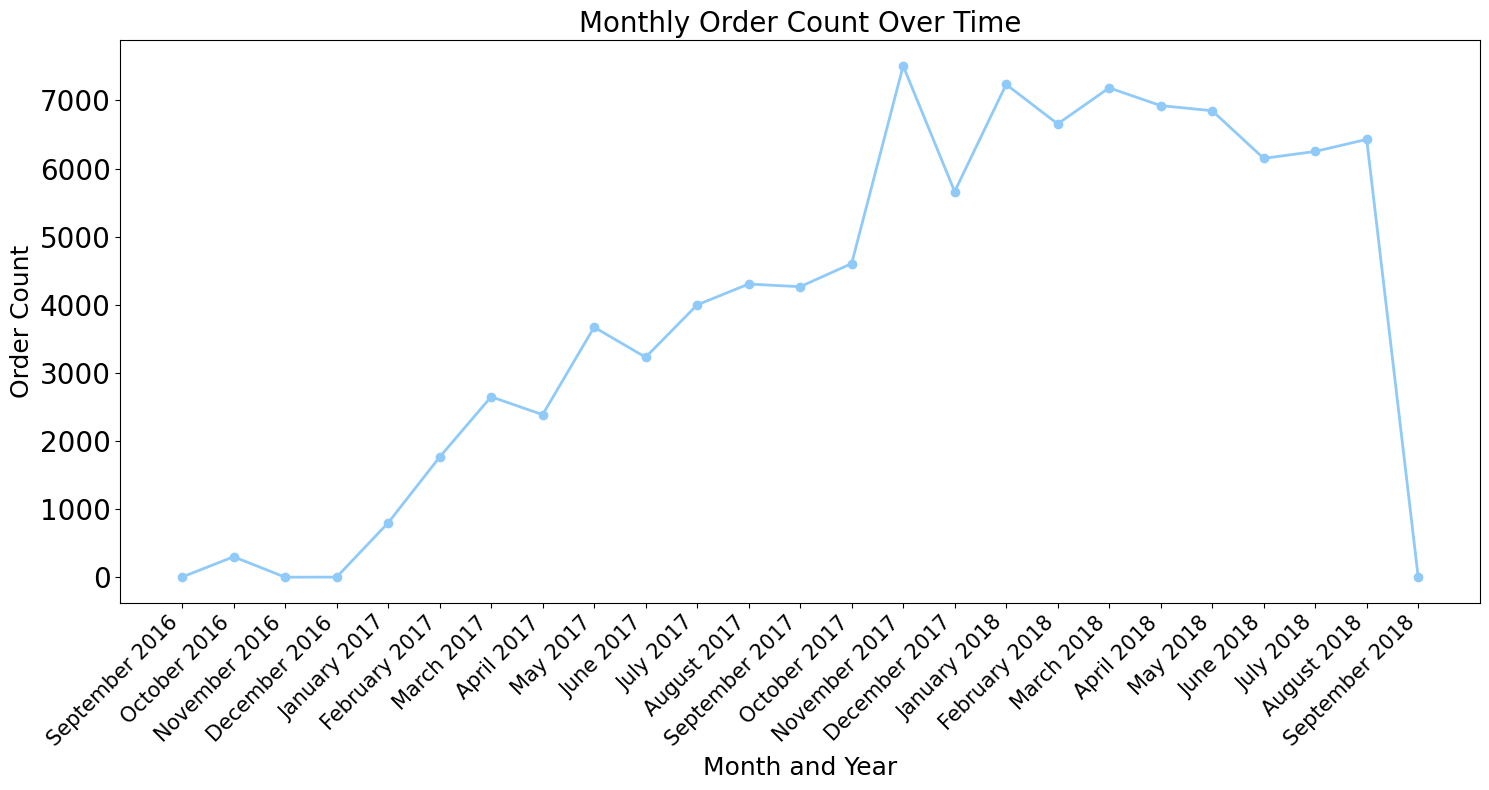

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(
    monthly_orders_df.index,  # Menggunakan indeks sebagai sumbu x
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelrotation=45, labelsize=15)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
ax.set_xticks(monthly_orders_df.index)  # Menetapkan titik-titik pada sumbu x
ax.set_xticklabels(monthly_orders_df["Month_Year"], rotation=45, ha="right")  # Mengatur label pada sumbu x
ax.set_xlabel("Month and Year", fontsize=18)
ax.set_ylabel("Order Count", fontsize=18)
ax.set_title("Monthly Order Count Over Time", fontsize=20)

plt.tight_layout()

***Berikut merupakan visualisasi untuk 5 bulan terakhir***

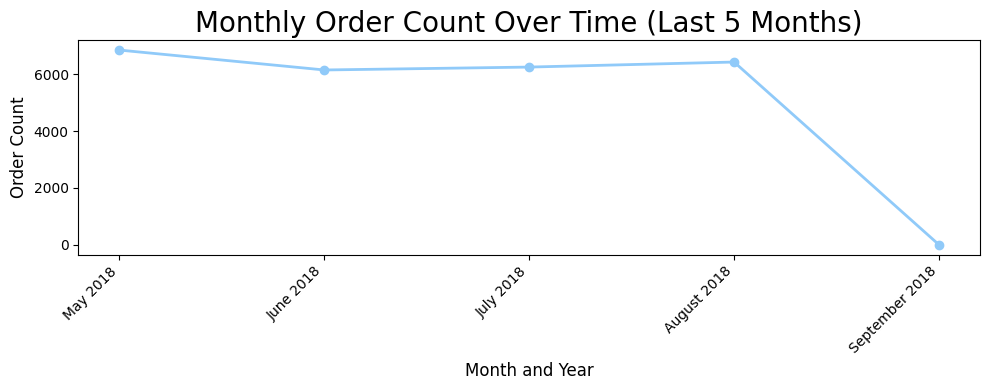

In [101]:
# Ambil hanya 5 baris terakhir dari DataFrame
recent_data = monthly_orders_df.tail(5)

# Buat plot menggunakan data yang telah dipotong
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(
    recent_data.index,  # Menggunakan indeks sebagai sumbu x
    recent_data["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
ax.set_xticks(recent_data.index)  # Menetapkan titik-titik pada sumbu x
ax.set_xticklabels(recent_data["Month_Year"], rotation=45, ha="right")  # Mengatur label pada sumbu x
ax.set_xlabel("Month and Year", fontsize=12)
ax.set_ylabel("Order Count", fontsize=12)
ax.set_title("Monthly Order Count Over Time (Last 5 Months)", fontsize=20)

plt.tight_layout()
plt.show()

***Visualisasikan juga total revenue yang dimiliki perusahaan 5 bulan terakhir***

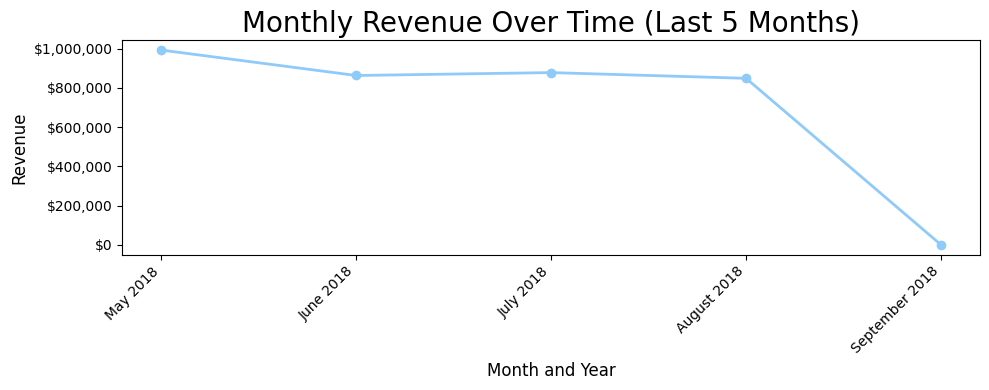

In [105]:
# Format dollar pada y-axis
def format_dollars(value, _):
    return "${:,.0f}".format(value)

# Ambil hanya 5 baris terakhir dari DataFrame
recent_data = monthly_orders_df.tail(5)

# Buat plot menggunakan data yang telah dipotong
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(
    recent_data.index,  # Menggunakan indeks sebagai sumbu x
    recent_data["revenue"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
ax.set_xticks(recent_data.index)  # Menetapkan titik-titik pada sumbu x
ax.set_xticklabels(recent_data["Month_Year"], rotation=45, ha="right")  # Mengatur label pada sumbu x
ax.set_xlabel("Month and Year", fontsize=12)
ax.set_ylabel("Revenue", fontsize=12)
# Format y-axis as dollars
ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))
ax.set_title("Monthly Revenue Over Time (Last 5 Months)", fontsize=20)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Produk pada kategori apa yang paling banyak dan paling sedikit terjual?

In [84]:
tabel_product.head(5)

,count_order,average_price
product_category_name_english,,
bed_bath_table,11115,93.296327
health_beauty,9670,130.163531
sports_leisure,8641,114.344285
furniture_decor,8334,87.564494
computers_accessories,7827,116.513903


<ipython-input-85-c6a33a786ce2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x="count_order", y="product_category_name_english", data=tabel_product.head(5), palette=colors, ax=ax[0])
<ipython-input-85-c6a33a786ce2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x="count_order", y="product_category_name_english", data=tabel_product.sort_values(by="count_order", ascending=True).head(5), palette=colors, ax=ax[1])


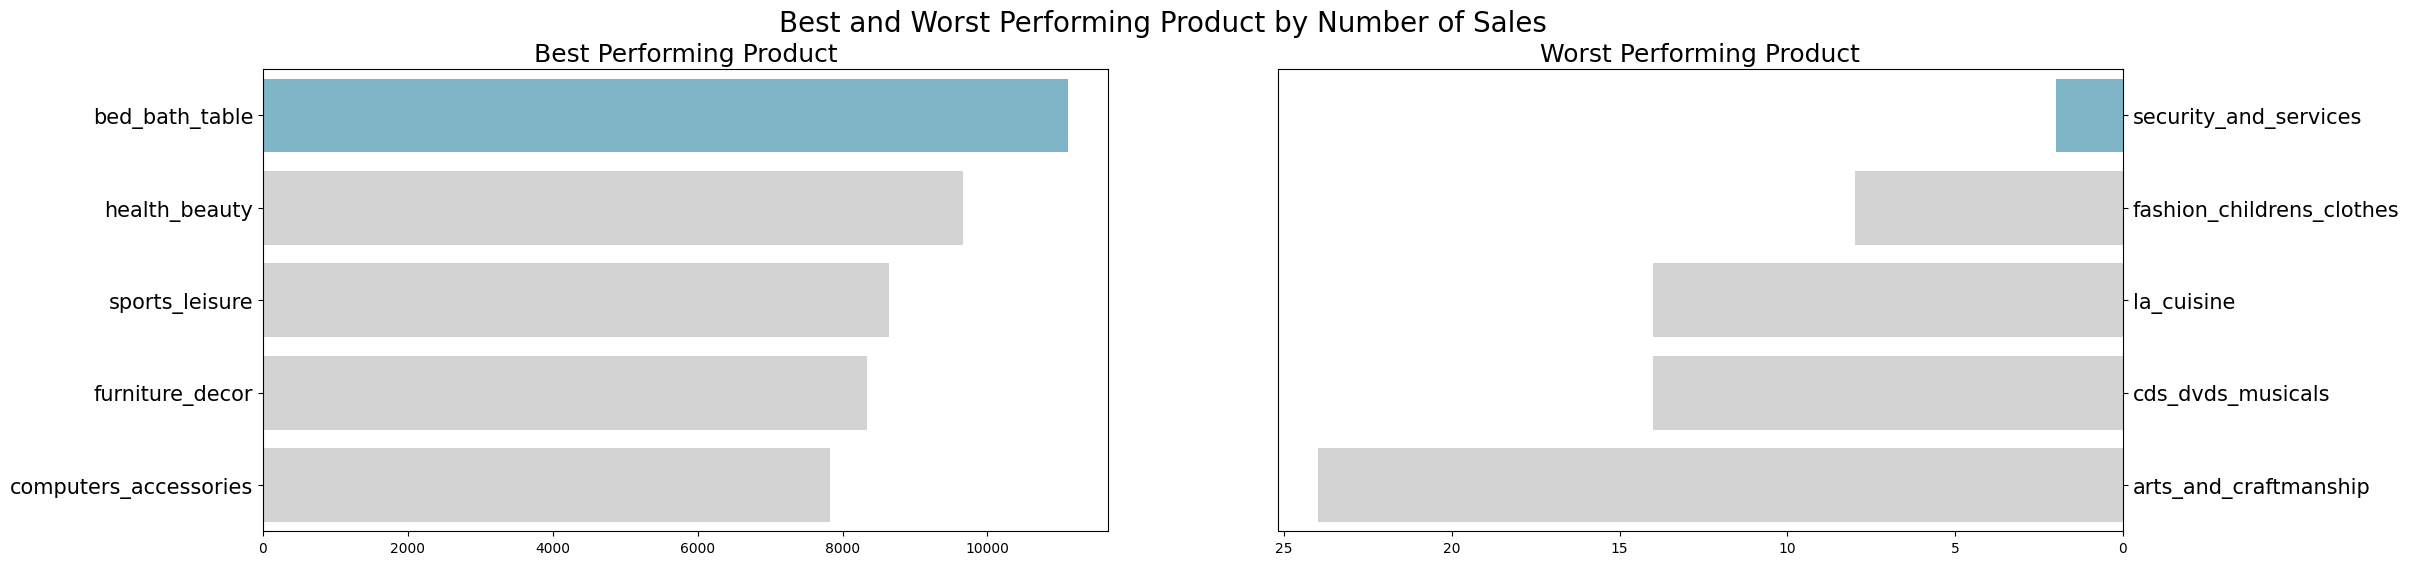

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sn.barplot(x="count_order", y="product_category_name_english", data=tabel_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sn.barplot(x="count_order", y="product_category_name_english", data=tabel_product.sort_values(by="count_order", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Berapa rata-rata rating yang diberikan oleh pelanggan ketika membeli produk yang favorit terjual?

In [86]:
item_count_avg_rating.head(5)

,total_order,avg_review_score
product_category_name_english,,
bed_bath_table,13911,3.895663
furniture_decor,11663,3.903493
health_beauty,11140,4.142768
sports_leisure,10001,4.107986
computers_accessories,9959,3.930819


***Buat visualisasi menggunakan histogram untuk mengetahui rating yang sering diberikan pelanggan dengan 20 produk teratas***

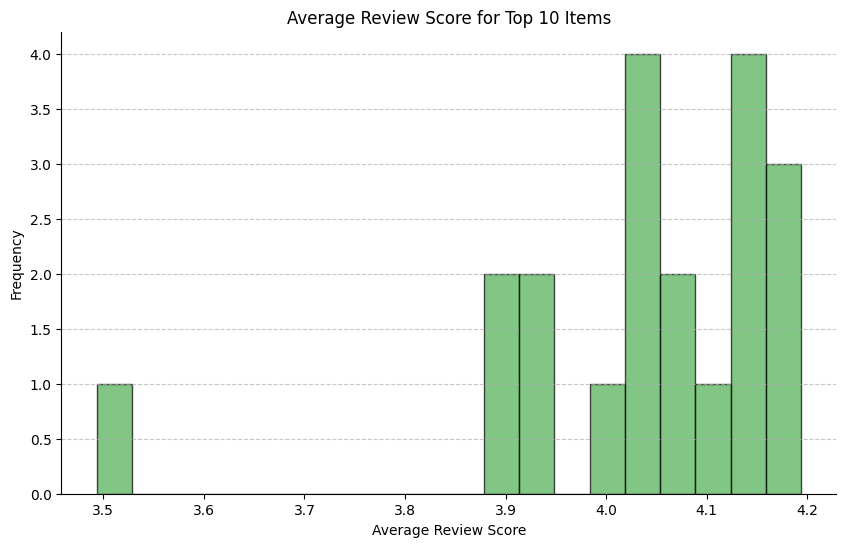

In [108]:
# Ambil hanya produk 10 teratas dari DataFrame
top_20_items = item_count_avg_rating.head(20)

# Buat histogram menggunakan data yang telah dipotong
plt.figure(figsize=(10, 6))
plt.hist(top_10_items['avg_review_score'], bins=20, color='#4CAF50', edgecolor='black', alpha=0.7)

plt.title('Average Review Score for Top 20 Items')
plt.xlabel('Average Review Score')
plt.ylabel('Frequency')

# Sembunyikan spines atas dan kanan
plt.gca().spines[['top', 'right']].set_visible(False)

# Tampilkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 4 :Bagaimana demografi pelanggan yang dimiliki dan berapa waktu delivery rata-ratanya?

In [109]:
state_customer = order_cust_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
state_customer.rename(columns={
    "customer_id": "customer_count"
    }, inplace=True)

Text(0.5, 1.0, 'Percentage of Customers by States (Top 5 and other)')

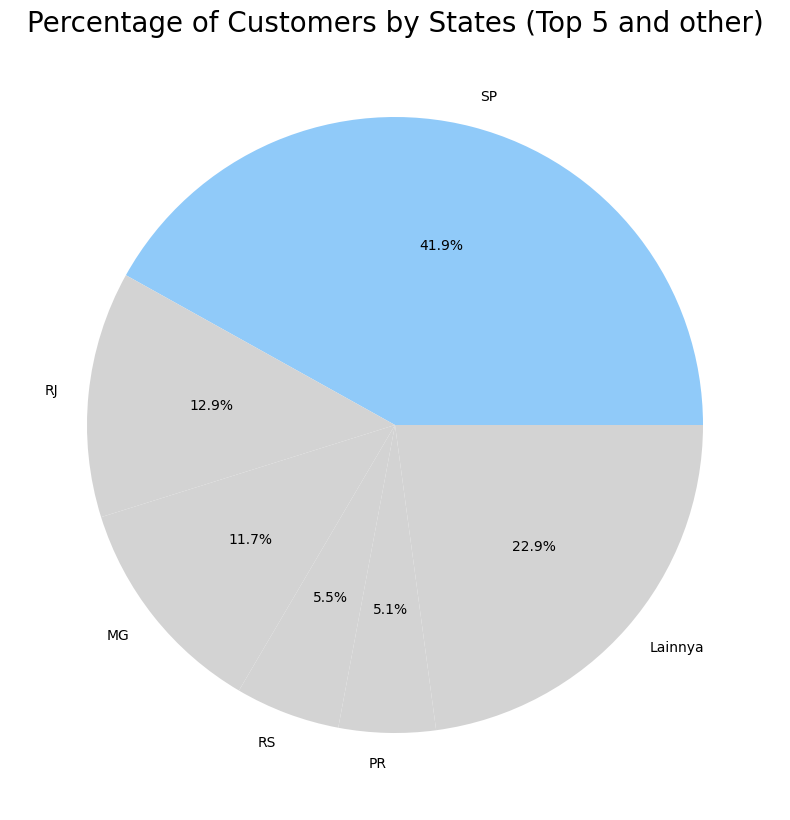

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))

# Pilih lima teratas
top_states = state_customer.sort_values(by="customer_count", ascending=False).head(5)

# Tambahkan kategori "Lainnya" untuk menyimpan sisa negara
other_states_count = state_customer["customer_count"].sum() - top_states["customer_count"].sum()
other_states = pd.DataFrame({"customer_state": ["Lainnya"], "customer_count": [other_states_count]})

# Gabungkan lima teratas dengan kategori "Lainnya"
top_and_other = pd.concat([top_states, other_states])

# Gunakan pie chart
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
ax.pie(
    top_and_other["customer_count"],
    labels=top_and_other["customer_state"],
    autopct='%1.1f%%',
    colors=colors
)
ax.set_title("Percentage of Customers by States (Top 5 and other)", fontsize=20)

In [ ]:
result= orders_customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_state" : "count" ,
    "delivery_time": ["max", "min", "mean", "std"],
    "expected_delivery" : ["max", "min", "mean", "std"]
})

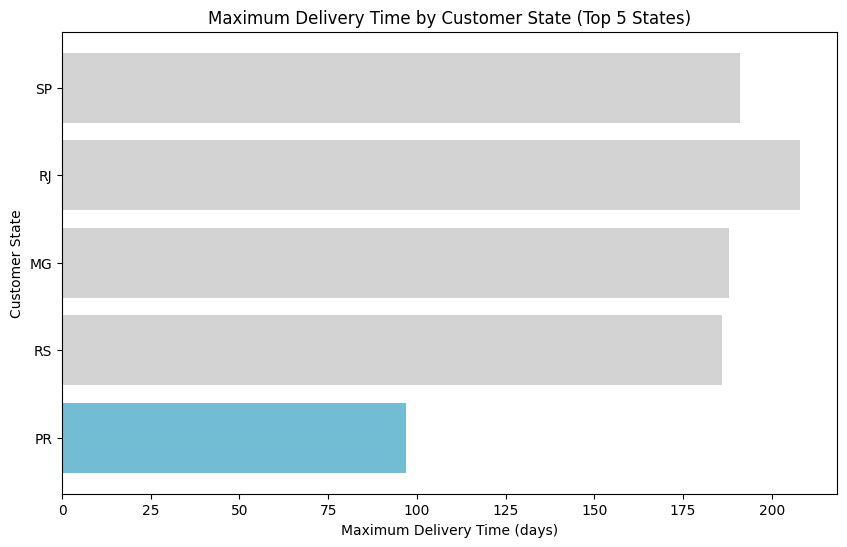

In [138]:
# Ambil hanya 5 customer_state teratas dari DataFrame
top_5_states = result_sorted_delivery.head(5)

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
# Buat bar plot vertikal
plt.figure(figsize=(10, 6))
plt.barh(top_5_states['customer_state_'], top_5_states['delivery_time_max'], color=colors)

plt.xlabel('Maximum Delivery Time (days)')
plt.ylabel('Customer State')
plt.title('Maximum Delivery Time by Customer State (Top 5 States)')

plt.gca().invert_yaxis()  # Memflip sumbu y untuk menampilkan yang teratas di atas

plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jadi, Pada may 2018 - agustus 2018 (4 bulan terakhir) banyaknya order cenderung stagnant, tidak signifikan turun/naik. Begitu juga dengan revenue yang didapatkan oleh perusahaan rata-rata stagnat dengan total revenue 13.496.263,43 AUD
- Conclution pertanyaan 2 : Jadi, kategori produk yang paling diminati adalah bed_bath_table dan kategori produk yang kurang diminati adalah security and services
- Conclution pertanyaan 3 : Jadi, rata-rata ratingnya adalah 4-4,2 pada 20 produk pembelian teratas
- Conclution pertanyaan 4 : Jadi, rata-rata demografi terbanyak pelanggan adalah pada state SP,RJ,MG,RS,dan PR dengan waktu delivery tercepat adalah PR

## Analisis RFM

In [141]:
rfm_df = order_cust_df.groupby(by="customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
        "order_id": "nunique",
        "price": "sum"
    })
rfm_df.columns = ["customer_id", "order_purchase_timestamp", "frequency", "monetary"]
rfm_df["order_purchase_timestamp"] = pd.to_datetime(rfm_df["order_purchase_timestamp"]).dt.to_period('M')
recent_date = order_cust_df["order_purchase_timestamp"].max().to_period('M')
rfm_df["recency"] = rfm_df["order_purchase_timestamp"].apply(lambda x: (recent_date - x).n)
rfm_df.drop("order_purchase_timestamp", axis=1, inplace=True)

In [144]:
# Fungsi slice_customer_id untuk memotong customer_id menjadi 3 huruf depan
def slice_customer_id(customer_id):
    return customer_id[:3]

# Menggunakan fungsi slice_customer_id pada kolom customer_id
rfm_df['short_customer_id'] = rfm_df['customer_id'].apply(slice_customer_id)

<ipython-input-146-1d31da91424f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-146-1d31da91424f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-146-1d31da91424f>:13: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sn.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipyth

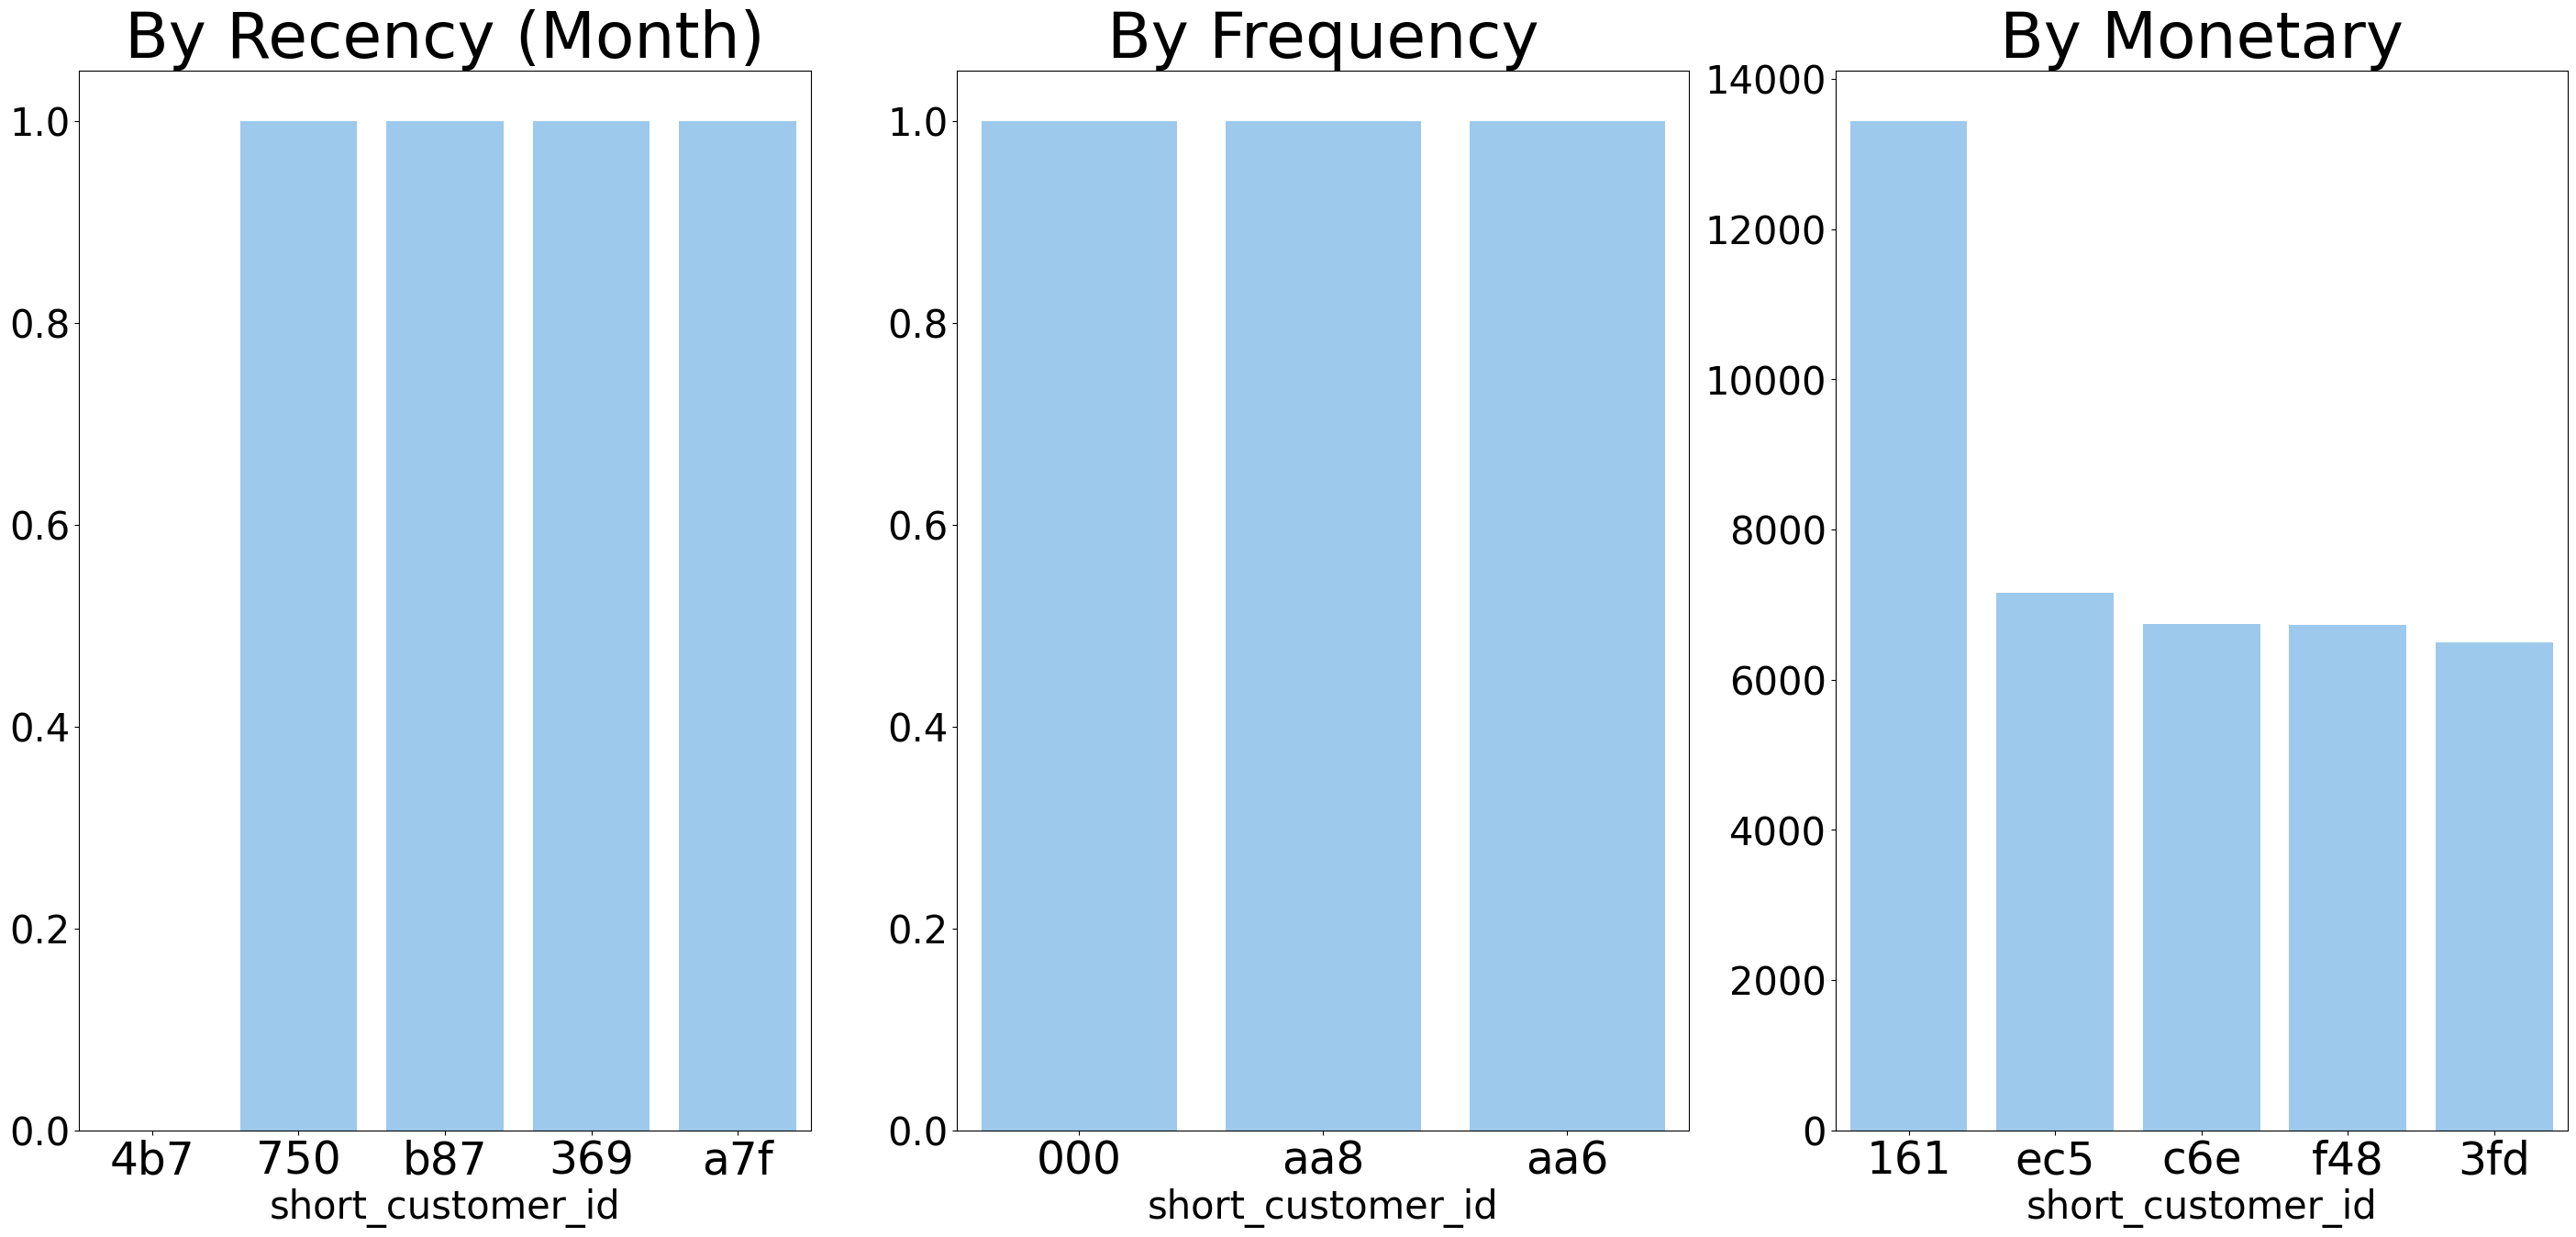

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sn.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("short_customer_id", fontsize=30)
ax[0].set_title("By Recency (Month)", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=35)



sn.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("short_customer_id", fontsize=30)
ax[1].set_title("By Frequency", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=35)

sn.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("short_customer_id", fontsize=30)
ax[2].set_title("By Monetary", loc="center", fontsize=50)
ax[2].tick_params(axis='y', labelsize=30)
ax[2].tick_params(axis='x', labelsize=35)


Analisis RFM (Recency, Frequency, Monetary) adalah teknik segmentasi pelanggan yang menggunakan tiga metrik kunci untuk mengidentifikasi segmen pelanggan yang berbeda. Berikut adalah penjelasan berdasarkan parameter RFM yang diberikan :
#note : nilai dilihat dari dashboard
Recency (R): Rata-rata Recency (Bulan) - 8.5

Recency mengacu pada seberapa baru pelanggan melakukan pembelian. Dalam hal ini, rata-rata recency adalah 8,5 bulan. Ini berarti, rata-rata, pelanggan di segmen ini melakukan pembelian terakhir mereka 8,5 bulan yang lalu. Nilai recency yang lebih rendah menunjukkan aktivitas yang lebih baru, yang dapat menjadi indikator positif untuk keterlibatan pelanggan. Frequency (F): Rata-rata Frequency - 1.0

Frequency mengukur seberapa sering pelanggan melakukan pembelian. Rata-rata frequency sebesar 1,0 menunjukkan bahwa, rata-rata, pelanggan di segmen ini melakukan satu pembelian. Ini menunjukkan frekuensi transaksi yang relatif rendah. Tergantung pada konteks bisnis Anda, ini mungkin dianggap rendah atau tinggi. Monetary (M): Rata-rata Monetary - AUD 136.58

Monetary mencerminkan jumlah uang rata-rata yang dihabiskan pelanggan. Dalam hal ini, nilai monetary rata-rata adalah AUD 136,58. Ini mewakili nilai rata-rata pengeluaran per transaksi untuk pelanggan di segmen ini. Nilai monetary yang lebih tinggi menunjukkan bahwa pelanggan di segmen ini cenderung menghabiskan lebih banyak per transaksi.